In [ ]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Edtech = pd.read_csv('/content/drive/MyDrive/Practice data/online_Business_p1_p626.csv')

In [ ]:
Edtech.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail_price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.7,4.7,78006,False,84,0,14-02-2016,06-04-2016,455.0,"8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.6,4.6,54581,False,78,0,22-08-2016,23-08-2016,455.0,"8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.6,4.6,52653,False,292,2,26-09-2017,14-11-2017,455.0,"8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.5,4.5,46447,False,338,0,23-10-2015,21-01-2016,455.0,"8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.5,4.5,41630,False,83,0,12-10-2015,11-01-2016,455.0,"8,640"


**Firstly we are going to clean our data as there can be multicolinierity in the data and other unnecessary columns in the data.**

In [ ]:
# checking columns

Edtech.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'rating', 'num_reviews', 'is_wishlisted', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'published_time',
       'discount_price__amount', 'price_detail_price_string'],
      dtype='object')

In [ ]:
# dropping unnecessary column

Edtech.drop(['url'], axis=1, inplace=True)

In [ ]:
# removing special character from title coulumn there are multiple special charecters available in the columns

Edtech['title'] = Edtech['title'].str.replace('[#,@,&,!,*,.,â„¢,",?,?,:,]', '')
Edtech['price_detail_price_string'] = Edtech['price_detail_price_string'].str.replace('[#,@,&,!,*,.,â„¢,",?,?,:,]', '')

In [ ]:
#counting null values

Edtech.isnull().sum()

id                                0
title                             0
is_paid                           0
num_subscribers                   0
avg_rating                        0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
published_time                    0
discount_price__amount          510
price_detail_price_string         0
dtype: int64

**There is only 1 column which have null value neither we will drop this nor replace this as this is giving info about discount. Null value simply mean that discount was not given.**

In [ ]:
Edtech.head(1)

,id,title,is_paid,num_subscribers,avg_rating,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail_price_string
0,762616,The Complete SQL Bootcamp 2020 Go from Zero to...,True,295509,4.7,4.7,78006,False,84,0,14-02-2016,06-04-2016,455.0,8640


**Checking top courses by different different variables**

In [ ]:
top_10_byavg_rating = Edtech[['title', 'num_subscribers','avg_rating']].sort_values(by='avg_rating',ascending=False).head(10)
top_10_byavg_rating

,title,num_subscribers,avg_rating
9446,How to enter the US market,14,5.0
8924,The Science of Teams (TSoT) - Theory,6,5.0
7984,eTribe - People who buy from you again and again,55,5.0
8952,Construction Procurement Masterclass,7,5.0
8932,Preparing for a Profitable Business Launch,15,5.0
8929,Get Approved on Upwork How to Get Approved You...,28,5.0
8030,Udemy Instructor Guide To Tracking Your Result...,27,5.0
8926,How To Start Your Own Food Brand And Sell In S...,484,5.0
8925,Business Analytics with Excel,29,5.0
8917,Create a Money Making Pitch for More Customers...,57,5.0


In [ ]:
top_10_byavg_rating

,title,num_subscribers,avg_rating
9446,How to enter the US market,14,5.0
8924,The Science of Teams (TSoT) - Theory,6,5.0
7984,eTribe - People who buy from you again and again,55,5.0
8952,Construction Procurement Masterclass,7,5.0
8932,Preparing for a Profitable Business Launch,15,5.0
8929,Get Approved on Upwork How to Get Approved You...,28,5.0
8030,Udemy Instructor Guide To Tracking Your Result...,27,5.0
8926,How To Start Your Own Food Brand And Sell In S...,484,5.0
8925,Business Analytics with Excel,29,5.0
8917,Create a Money Making Pitch for More Customers...,57,5.0


In [ ]:
top_10_by_subs = Edtech[['title', 'num_subscribers']].sort_values(by='num_subscribers',ascending=False).head(10)
top_10_by_subs

,title,num_subscribers
4,An Entire MBA in 1 CourseAward Winning Busines...,374836
0,The Complete SQL Bootcamp 2020 Go from Zero to...,295509
3,The Complete Financial Analyst Course 2020,245860
19,Deep Learning Prerequisites The Numpy Stack in...,239309
1,Tableau 2020 A-Z Hands-On Tableau Training for...,209070
15,The Complete Financial Analyst Training Inves...,182002
35,The Complete Presentation and Public Speaking/...,158654
2,PMP Exam Prep Seminar - PMBOK Guide 6,155282
22,Introduction to Finance Accounting Modeling an...,140676
7,Beginner to Pro in Excel Financial Modeling an...,127680


In [ ]:
top_10_bynum_reviews = Edtech[['title', 'num_reviews']].sort_values(by='num_reviews',ascending=False).head(10)

top_10_bynum_reviews

,title,num_reviews
0,The Complete SQL Bootcamp 2020 Go from Zero to...,78006
1,Tableau 2020 A-Z Hands-On Tableau Training for...,54581
2,PMP Exam Prep Seminar - PMBOK Guide 6,52653
3,The Complete Financial Analyst Course 2020,46447
4,An Entire MBA in 1 CourseAward Winning Busines...,41630
5,Microsoft Power BI - A Complete Introduction [...,38093
6,Agile Crash Course Agile Project Management; A...,30470
7,Beginner to Pro in Excel Financial Modeling an...,28665
8,Become a Product Manager | Learn the Skills G...,27408
9,The Business Intelligence Analyst Course 2020,23906


In [ ]:
#Both dates are series type will convert it into date format to do further analysis

type(Edtech['created'])
type(Edtech['published_time'])

pandas.core.series.Series

In [ ]:
Edtech['created'] = pd.to_datetime(Edtech['created'])

Edtech['date_created'] = Edtech['created'].dt.date

In [ ]:
Edtech['date_created']

0       2016-02-14
1       2016-08-22
2       2017-09-26
3       2015-10-23
4       2015-12-10
           ...    
9442    2018-09-27
9443    2018-11-29
9444    2018-10-13
9445    2020-01-20
9446    2020-07-02
Name: date_created, Length: 9447, dtype: object

In [ ]:
#now we will see if there is any lenier relationship between variables or not

In [ ]:
#converting string datatype to int

Edtech['price_detail_price_string'] = Edtech['price_detail_price_string'].apply(pd.to_numeric)

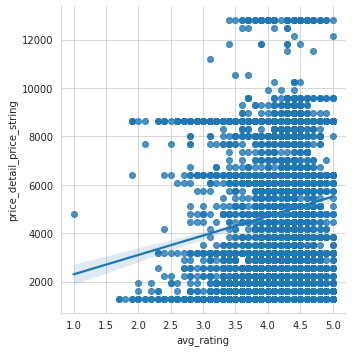

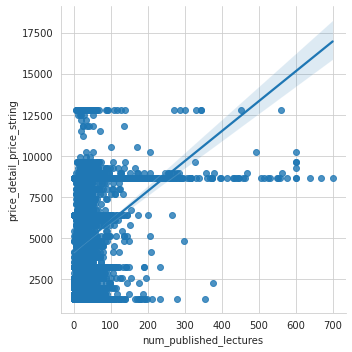

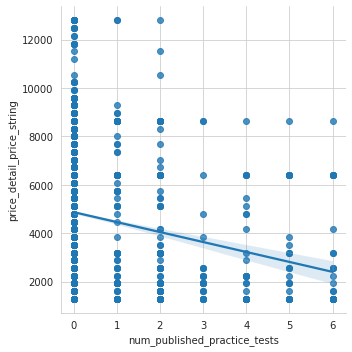

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='avg_rating', y ='price_detail_price_string', data = Edtech)
sns.lmplot(x ='num_published_lectures', y ='price_detail_price_string', data = Edtech)
sns.lmplot(x ='num_published_practice_tests', y ='price_detail_price_string', data = Edtech)

In [ ]:
Edtech.to_csv('\content\drive\MyDrive\Practice data\fil.csv', index=False)

We can see that all the columns are somehow affecting the price there is slight linear relationship between price and ratings. As the rating is high price is also high.

Note:- Number of published tests have negative slope

**Since, I do not see any other important column available in the dataset. I will move to the visulization part in tabeau to look at the numbers.**